# G:  Fashion

Zalando - the online fashion retailer - has created a dataset. It is available on Kaggle but, like MNIST, Keras keeps a copy. It is deliberately similar to MNIST (which is why the dataset is called Fashion-MNIST). It comprises 70,000 grayscale images, each one $28 \times 28$ pixels in size. 60,000 are training examples and 10,000 are test examples. Each is labelled with one of 10 classes, already Label Encoded 0-9, where the labels represent the following: 0 T-shirt/top, 1 Trouser, 2 Pullover, 3 Dress, 4 Coat, 5 Sandal, 6 Shirt, 7 Sneaker, 8 Bag, 9 Ankle boot.

In this lab, I want you to get used to coding up neural networks. Build some models using Keras; and try some model selection using keras-tuner.

There are neither hints nor answers in this lab sheet.

In [1]:
# Here is a selection of import statements.
# You might not use all of them; and you might decide to include extra ones.

import matplotlib.pyplot as plt

from keras import Model
from keras import Input
from keras.layers import Dense
from keras.layers import Rescaling
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import BatchNormalization
from keras.layers import Dropout
import keras
from keras import layers

from keras import Model
from keras import Input
from keras.layers import Dense
from keras.layers import Normalization
from keras.layers import Rescaling

from keras.optimizers import RMSprop

from keras.datasets import mnist

from keras.models import load_model

from keras.optimizers import RMSprop
from keras.optimizers import Adam

from keras.callbacks import EarlyStopping

from keras.regularizers import l2

from keras.datasets import fashion_mnist

2025-11-06 21:47:14.369467: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-06 21:47:14.370084: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-06 21:47:14.372961: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-06 21:47:14.380234: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1762465634.392313   80794 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1762465634.39

In [2]:
# If you are running on Google Colab, uncomment the next line before executing this code cell.

! pip install keras_tuner

import keras_tuner


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [3]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


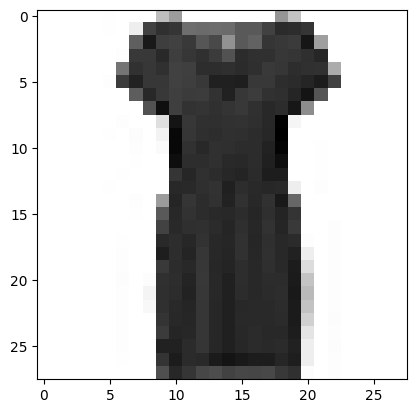

In [4]:
plt.imshow(X_train[20], cmap=plt.cm.binary, interpolation="nearest")

## Dense Network

We'll start with a dense network: one with *no* convolutional layers.

- Reshape the images so that each becomes one-dimensonal.
- Then define a dense neural network: input layer; rescaling; one dense hidden layer with 512 units using ReLU; and a dense output layer using the appropriate activation function.
- Compile it: use RMSprop as the optimizer with a learning rate of 0.01; choose the appropriate loss function; use accuracy as the metric.
- Fit it: use 0.25 validation split; 10 epochs; batch size of 32.
- Look at the training accuracy and validation accuracy: do you think you are underfitting? overfitting?

In [10]:
# Reshape image
X_train = X_train.reshape((60000, 28 * 28))
X_test = X_test.reshape((10000, 28 * 28))

In [11]:
# Define dense layers
inputs = Input(shape=(784,))
x = Normalization()(inputs)
x = Dense(units=512, activation="relu")(x)
outputs = Dense(units=10, activation="softmax")(x)
cloth_model = Model(inputs, outputs)

In [12]:
# Compile it
cloth_model.compile(optimizer=RMSprop(learning_rate=0.01),
                    loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [13]:
history = cloth_model.fit(
    X_train, y_train, validation_split=0.25, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3658 - loss: 43.4310 - val_accuracy: 0.3663 - val_loss: 1.9596
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3316 - loss: 2.3843 - val_accuracy: 0.2833 - val_loss: 1.8816
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3359 - loss: 2.1895 - val_accuracy: 0.3417 - val_loss: 1.7839
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3362 - loss: 1.9396 - val_accuracy: 0.3365 - val_loss: 1.7684
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3446 - loss: 1.9044 - val_accuracy: 0.3451 - val_loss: 1.8275
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3453 - loss: 2.0057 - val_accuracy: 0.3692 - val_loss: 1.8976
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3449 - loss: 1.8982 - val_accuracy: 0.3445 - val_loss: 1.8309
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3441 - loss: 1.8152 -

In [14]:
train_acc, val_acc = history.history["accuracy"][-1], history.history["val_accuracy"][-1]
train_acc, val_acc

(0.34860000014305115, 0.3250666558742523)

In [15]:
def plot_keras_history(history, metric):
    fig, axes = plt.subplots(1, 2, figsize=(6, 3))
    fig.tight_layout()
    axes[0].plot(history.history["loss"], label="train loss")
    axes[0].plot(history.history["val_loss"], label="val loss")
    axes[0].set_title("Loss")
    axes[0].legend()
    axes[1].plot(history.history[metric], label="train " + metric)
    axes[1].plot(history.history["val_" + metric], label="val " + metric)
    axes[1].set_title(metric)
    axes[1].legend()
    plt.show()

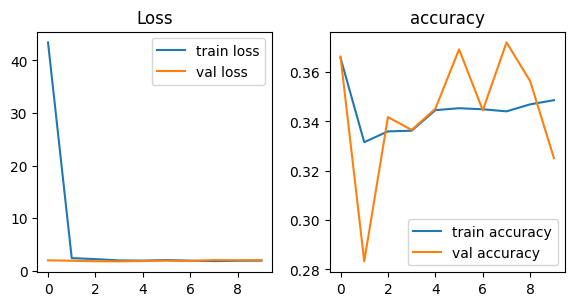

In [16]:
plot_keras_history(history, "accuracy")

TESTING COLAB

In [ ]:
def build_model(hp):
    # inputs = Input(shape=(4,))
    # x = Normalization()(inputs)
    # x = Dense(units=16, activation="relu")(x)
    # hp_is_multilayered = hp.Boolean("is_multi_layered")
    # if hp_is_multilayered:
    #     x = Dense(hp.Choice("units", [2, 4, 8]), activation="relu")(x)
    # outputs = Dense(units=1, activation="linear")(x)
    # housing_model = Model(inputs, outputs)
    # housing_model.compile(optimizer=hp.Choice("optimizer", values =["sgd", "rmsprop", "adam", "nadam"]),
    #                       loss="mse", metrics=["mae"])
    inputs = Input(shape=(28*28,))
    x = Normalization()(inputs)
    
    x = Dense(units=10,activation="softmax")
    model = Model(input, outputs)
    model.compile(optimizer=hp.Choice("optimizer", values=["rmsprop","adam"]), loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model

In [ ]:
# def build_model(hp):
#     inputs = Input(shape=(28*28,))
#     x = Rescaling(scale-1./255)(inputs)
#     x = Dense(units=16, activation="relu")(x)
#     hp_is_multilayered = hp.Boolean("is_multi_layered")
#     if hp_is_multilayered:
#         x = Dense(hp.Choice("units", [2, 4, 8]), activation="relu")(x)
#     outputs = Dense(units=1, activation="linear")(x)
#     housing_model = Model(inputs, outputs)
#     housing_model.compile(optimizer=hp.Choice("optimizer", values =["sgd", "rmsprop", "adam", "nadam"]),
#                           loss="mse", metrics=["mae"]

In [ ]:
build_model(keras_tuner.HyperParameters())
tuner.search_space_summary()

Search space summary
Default search space size: 5
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 4, 'step': 1, 'sampling': 'linear'}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 4, 'max_value': 16, 'step': 4, 'sampling': 'linear'}
optimizer (Choice)
{'default': 'rmsprop', 'conditions': [], 'values': ['rmsprop', 'adam'], 'ordered': False}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 4, 'max_value': 16, 'step': 4, 'sampling': 'linear'}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 4, 'max_value': 16, 'step': 4, 'sampling': 'linear'}


In [ ]:
tuner = keras_tuner.RandomSearch(
    build_model,
    objective="val_accuracy",
    max_trials=10,
    directory=".",
    project_name="tuner_state",
    overwrite=True)
# tuner.search_space_summary()
tuner.search(X_train, y_train, epochs=10, validation_split=0.25)

Trial 10 Complete [00h 00m 46s]
val_accuracy: 0.5763999819755554

Best val_accuracy So Far: 0.6403999924659729
Total elapsed time: 00h 07m 53s


In [ ]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 4,
 'units_1': 12,
 'optimizer': 'adam',
 'units_2': 12,
 'units_3': 16}

In [ ]:
best_model = tuner.get_best_models(num_models=1)[0]

/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
best_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 12)             │         9,420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 12)             │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,954 (38.88 KB)

 Trainable params: 9,954 (38.88 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = best_model.fit(
    X_train, y_train, validation_split=0.25, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6285 - loss: 0.8472 - val_accuracy: 0.5845 - val_loss: 1.4891
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6279 - loss: 0.8817 - val_accuracy: 0.6433 - val_loss: 0.8327
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6291 - loss: 0.8339 - val_accuracy: 0.6435 - val_loss: 0.8318
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6349 - loss: 0.8220 - val_accuracy: 0.6197 - val_loss: 0.8981
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6313 - loss: 0.8348 - val_accuracy: 0.6337 - val_loss: 0.8594
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6415 - loss: 0.8164 - val_accuracy: 0.6422 - val_loss: 0.8357
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6462 - loss: 0.7981 - val_accuracy: 0.6407 - val_loss: 0.8336
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6394 - loss: 0.8267 - 

In [ ]:
train_acc, val_acc = history.history["accuracy"][-1], history.history["val_accuracy"][-1]
train_acc, val_acc

(0.6388000249862671, 0.6450666785240173)

Now, let's practice with `keras-tuner` hyperparameters.

Define a function that builds and compiles the model. Use `keras-tuner` hyperparameters so
- the network may have one dense hidden layer, or two or three
- the number of neurons in each of these layers may be 4 or 8 or 16
- the optimizer may be RMsprop or Adam

Use a random search, rather than grid search, with a maximum of 10 trials.

What are the best hyperparameter values?

Then fit a model using these hyperaparameter values and get the training and validation accuracy. Are they better than for the model you defined above? Are we underfitting? Overfitting?

## Convolutional Network

Now we'll try a convolutional neural network. We won't use `keras-tuner` this time - it would all take too long.

- Reshape the images so that each becomes three-dimensional.
- Then define a convolutional neural network: input layer; recsaling; a convolutional layer with a $3 \times 3$ window, 8 feature maps, and using ReLU; batch normalization; max pooling with a $2 \times 2$ window; then another convolutional layer, this time with 4 feature maps; batch normalization; max pooling; then flatten; and a dense output layer using the appropriate activation function.
- Compile it: use RMSprop as the optimizer with a learning rate of 0.01; choose the appropriate loss function; use accuracy as the metric.
- Fit it: use 0.25 validation split; 30 epochs; batch size of 32. But this time include early stopping with a patience of 4.
  
Look at the training accuracy and validation accuracy. Is this better than the models you defined earlier? Are we underfitting? Overfitting?

Suppose I tell you that people claim that accuracy of at least 93% and even up to about 99% is possible on this dataset.

Hence, are your models underfitting? Overfitting? Neither?

Within the time you have available, change your convolutional network - try to get training accuracy and validation accuracy above 92%. Call me over to show me any notable successes.